In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
violations = pd.read_csv('/Users/CarlosKAustin/Downloads/MTA_Bus_Automated_Camera_Enforcement_Violations__Beginning_October_2019_20250919.csv')
speed_2025 = pd.read_csv('/Users/CarlosKAustin/Downloads/MTA_Bus_Route_Segment_Speeds__Beginning_2025_20250919.csv')
speed_2324 = pd.read_csv('/Users/CarlosKAustin/Downloads/MTA_Bus_Route_Segment_Speeds2023_2024.csv')

In [3]:
print(speed_2324.head())

   Year  Month               Timestamp Route ID   Borough Route Type  \
0  2023      3  03/01/2023 09:00:00 AM       B6  Brooklyn    Limited   
1  2023      3  03/01/2023 01:00:00 PM       B6  Brooklyn    Limited   
2  2023      3  03/01/2023 01:00:00 AM     BX42     Bronx      Local   
3  2023      3  03/01/2023 01:00:00 PM     BXM1     Bronx    Express   
4  2023      3  03/01/2023 12:00:00 PM     BXM1     Bronx    Express   

   Stop Order  Timepoint Stop ID      Timepoint Stop Name  \
0           1             306921    LIVONIA AV/ASHFORD ST   
1           1             306921    LIVONIA AV/ASHFORD ST   
2          29             102613  RANDALL AV/E TREMONT AV   
3          13             404250        BROADWAY/W 207 ST   
4          29             403424     LEXINGTON AV/E 50 ST   

   Next Timepoint Stop ID Next Timepoint Stop Name  Road Distance  \
0                  300590    COZINE AV /ASHFORD ST          0.724   
1                  300590    COZINE AV /ASHFORD ST          0.

In [4]:
print(speed_2324.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656097 entries, 0 to 11656096
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Year                      int64  
 1   Month                     int64  
 2   Timestamp                 object 
 3   Route ID                  object 
 4   Borough                   object 
 5   Route Type                object 
 6   Stop Order                int64  
 7   Timepoint Stop ID         int64  
 8   Timepoint Stop Name       object 
 9   Next Timepoint Stop ID    int64  
 10  Next Timepoint Stop Name  object 
 11  Road Distance             float64
 12  Average Travel Time       float64
 13  Average Road Speed        float64
 14  Bus Trip Count            int64  
 15  Hour of Day               int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 1.4+ GB
None


In [16]:
print("speed 2023:", speed_2324.columns)
print("speed 2025:", speed_2025.columns)

speed 2023: Index(['Year', 'Month', 'Timestamp', 'Route ID', 'Borough', 'Route Type',
       'Stop Order', 'Timepoint Stop ID', 'Timepoint Stop Name',
       'Next Timepoint Stop ID', 'Next Timepoint Stop Name', 'Road Distance',
       'Average Travel Time', 'Average Road Speed', 'Bus Trip Count',
       'Hour of Day'],
      dtype='object')
speed 2025: Index(['Year', 'Month', 'Timestamp', 'Day of Week', 'Hour of Day', 'Route ID',
       'Direction', 'Borough', 'Route Type', 'Stop Order', 'Timepoint Stop ID',
       'Timepoint Stop Name', 'Timepoint Stop Latitude',
       'Timepoint Stop Longitude', 'Next Timepoint Stop ID',
       'Next Timepoint Stop Name', 'Next Timepoint Stop Latitude',
       'Next Timepoint Stop Longitude', 'Road Distance', 'Average Travel Time',
       'Average Road Speed', 'Bus Trip Count', 'Timepoint Stop Georeference',
       'Next Timepoint Stop Georeference'],
      dtype='object')


In [5]:
print(speed_2025.head())

   Year  Month               Timestamp Day of Week  Hour of Day Route ID  \
0  2025      3  03/01/2025 05:00:00 PM    Thursday           17       B3   
1  2025      3  03/01/2025 10:00:00 AM    Thursday           10      B84   
2  2025      3  03/01/2025 06:00:00 PM    Thursday           18      B84   
3  2025      3  03/01/2025 10:00:00 AM    Thursday           10     BXM1   
4  2025      3  03/01/2025 12:00:00 PM    Thursday           12      M11   

  Direction    Borough Route Type  Stop Order  ...  Next Timepoint Stop ID  \
0         E   Brooklyn      Local          24  ...                  300220   
1         S   Brooklyn      Local           1  ...                  300590   
2         S   Brooklyn      Local           1  ...                  300590   
3         S      Bronx    Express          29  ...                  403821   
4         S  Manhattan      Local           7  ...                  401459   

  Next Timepoint Stop Name  Next Timepoint Stop Latitude  \
0     AVENUE U

In [6]:
print(speed_2025.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411549 entries, 0 to 3411548
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Month                             int64  
 2   Timestamp                         object 
 3   Day of Week                       object 
 4   Hour of Day                       int64  
 5   Route ID                          object 
 6   Direction                         object 
 7   Borough                           object 
 8   Route Type                        object 
 9   Stop Order                        int64  
 10  Timepoint Stop ID                 int64  
 11  Timepoint Stop Name               object 
 12  Timepoint Stop Latitude           float64
 13  Timepoint Stop Longitude          float64
 14  Next Timepoint Stop ID            int64  
 15  Next Timepoint Stop Name          object 
 16  Next Timepoint Stop Latitude      fl

In [19]:
#Concatenate into a new dataset called Speed

# 1) Parse timestamps in each dataset
for df in (speed_2025, speed_2324):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# 2) Clean column names (strip hidden spaces)
for df in (speed_2025, speed_2324):
    df.columns = df.columns.str.strip()

# 3) Align to common columns (avoids mismatches)
common_cols = speed_2025.columns.intersection(speed_2324.columns)
speed_2025 = speed_2025[common_cols].copy()
speed_2324 = speed_2324[common_cols].copy()

# 4) Concatenate row-wise into one dataset
speed = pd.concat([speed_2025, speed_2324], ignore_index=True)

In [20]:
print(speed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15067646 entries, 0 to 15067645
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Year                      int64         
 1   Month                     int64         
 2   Timestamp                 datetime64[ns]
 3   Hour of Day               int64         
 4   Route ID                  object        
 5   Borough                   object        
 6   Route Type                object        
 7   Stop Order                int64         
 8   Timepoint Stop ID         int64         
 9   Timepoint Stop Name       object        
 10  Next Timepoint Stop ID    int64         
 11  Next Timepoint Stop Name  object        
 12  Road Distance             float64       
 13  Average Travel Time       float64       
 14  Average Road Speed        float64       
 15  Bus Trip Count            int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(5

In [7]:
print(violations.head())

   Violation ID                                         Vehicle ID  \
0     489749182  c5ae1411153b52556a1e648cc80d718aa519a4bdd189ab...   
1     489744714  df9044acf85cf55488aea4cd3ce1d0e17ef050551726b6...   
2     489743631  eb5a337966ba65f66ab1db8e169d2446a4fb429b0efc63...   
3     489741945  3f877f70d9b253515a945be807c9c62d5814949f810310...   
4     489741940  7feac037b62d591ffb1214e356157f3dd197fc22fee5bb...   

         First Occurrence         Last Occurrence            Violation Status  \
0  08/20/2025 11:12:08 PM  08/21/2025 12:24:08 AM       TECHNICAL ISSUE/OTHER   
1  08/20/2025 11:48:59 PM  08/20/2025 11:54:47 PM    EXEMPT - BUS/PARATRANSIT   
2  08/20/2025 10:33:13 PM  08/20/2025 11:56:02 PM       TECHNICAL ISSUE/OTHER   
3  08/20/2025 10:50:45 PM  08/20/2025 11:32:43 PM              EXEMPT - OTHER   
4  08/20/2025 10:52:57 AM  08/20/2025 11:16:57 AM  EXEMPT - EMERGENCY VEHICLE   

         Violation Type Bus Route ID  Violation Latitude  Violation Longitude  \
0       MOB

In [8]:
print(violations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778568 entries, 0 to 3778567
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Violation ID            int64  
 1   Vehicle ID              object 
 2   First Occurrence        object 
 3   Last Occurrence         object 
 4   Violation Status        object 
 5   Violation Type          object 
 6   Bus Route ID            object 
 7   Violation Latitude      float64
 8   Violation Longitude     float64
 9   Stop ID                 int64  
 10  Stop Name               object 
 11  Bus Stop Latitude       float64
 12  Bus Stop Longitude      float64
 13  Violation Georeference  object 
 14  Bus Stop Georeference   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 432.4+ MB
None


In [9]:
violations.columns

Index(['Violation ID', 'Vehicle ID', 'First Occurrence', 'Last Occurrence',
       'Violation Status', 'Violation Type', 'Bus Route ID',
       'Violation Latitude', 'Violation Longitude', 'Stop ID', 'Stop Name',
       'Bus Stop Latitude', 'Bus Stop Longitude', 'Violation Georeference',
       'Bus Stop Georeference'],
      dtype='object')

In [22]:
speed.columns

Index(['Year', 'Month', 'Timestamp', 'Hour of Day', 'Route ID', 'Borough',
       'Route Type', 'Stop Order', 'Timepoint Stop ID', 'Timepoint Stop Name',
       'Next Timepoint Stop ID', 'Next Timepoint Stop Name', 'Road Distance',
       'Average Travel Time', 'Average Road Speed', 'Bus Trip Count'],
      dtype='object')

In [74]:
# Merge Datasets 
speed["date"] = speed["Timestamp"].dt.date
speed["hour"] = speed["Timestamp"].dt.hour
violations["date"] = violations["First Occurrence"].dt.date
violations["hour"] = violations["First Occurrence"].dt.hour


viol_stop = (
    violations.groupby(["Bus Route ID","date","hour","Stop ID","Violation Type"], as_index=False)
        .agg(cnt=("Violation ID","count"))
    .pivot_table(index=["Bus Route ID","date","hour","Stop ID"],
                 columns="Violation Type", values="cnt", fill_value=0)
    .reset_index()
    .rename(columns={"Bus Route ID":"route_id"})
)


merged_up = pd.merge(
    speed,
    viol_stop,
    left_on=["Route ID","date","hour","Timepoint Stop ID"],
    right_on=["route_id","date","hour","Stop ID"],
    how="left",
    suffixes=("","_up")
)


merged_seg = pd.merge(
    merged_up,
    viol_stop,
    left_on=["Route ID","date","hour","Next Timepoint Stop ID"],
    right_on=["route_id","date","hour","Stop ID"],
    how="left",
    suffixes=("","_down")
)


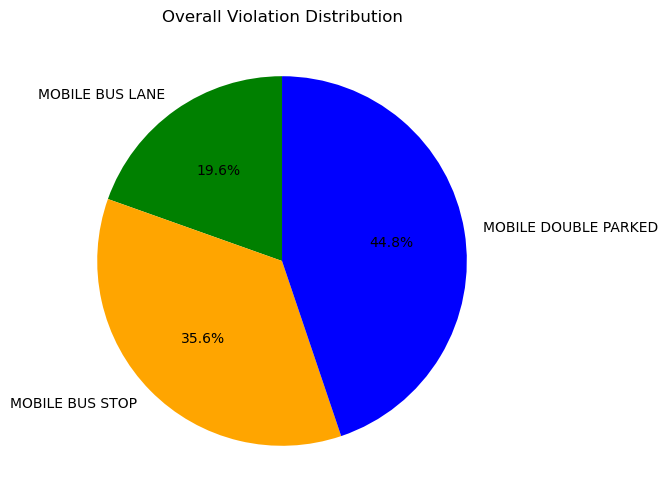

In [108]:
#Violation Distribution in a pie chart


viol_sums = merged_seg[["MOBILE BUS LANE","MOBILE BUS STOP","MOBILE DOUBLE PARKED"]].sum()


plt.figure(figsize=(6,6))
plt.pie(viol_sums, labels=viol_sums.index, autopct="%1.1f%%", startangle=90, 
        colors=["#008000","#FFA500","#0000FF"])
plt.title("Overall Violation Distribution")
plt.show()


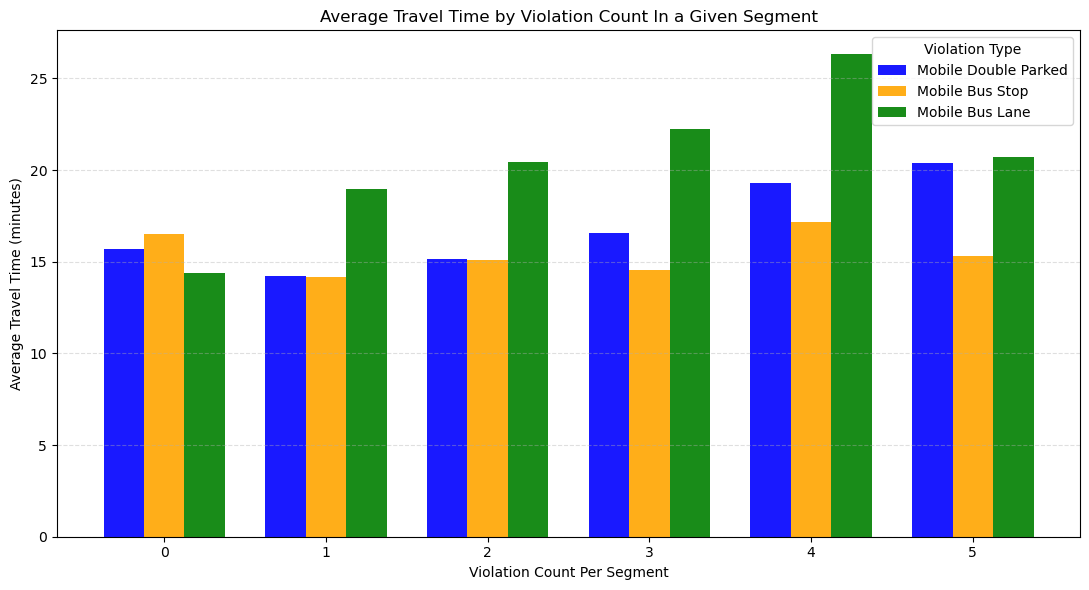

In [114]:
#Grouped bar chart with violation type on X and travel time per segment on Y


counts = range(0, 6)

# For each violation type, compute avg travel time at exactly that count
y_dp = [merged_seg.loc[merged_seg["MOBILE DOUBLE PARKED"] == c, "Average Travel Time"].mean() for c in counts]
y_bs = [merged_seg.loc[merged_seg["MOBILE BUS STOP"] == c, "Average Travel Time"].mean() for c in counts]
y_bl = [merged_seg.loc[merged_seg["MOBILE BUS LANE"] == c, "Average Travel Time"].mean() for c in counts]


x = np.arange(len(counts))
width = 0.25


fig, ax = plt.subplots(figsize=(11, 6))

ax.bar(x - width, y_dp, width, label="Mobile Double Parked",    color="#0000FF", alpha=0.9)
ax.bar(x,         y_bs, width, label="Mobile Bus Stop",         color="#FFA500", alpha=0.9)
ax.bar(x + width, y_bl, width, label="Mobile Bus Lane",         color="#008000", alpha=0.9)

ax.set_xticks(x)
ax.set_xticklabels([str(c) for c in counts])
ax.set_xlabel("Violation Count Per Segment")
ax.set_ylabel("Average Travel Time (minutes)")
ax.set_title("Average Travel Time by Violation Count In a Given Segment")
ax.legend(title="Violation Type")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


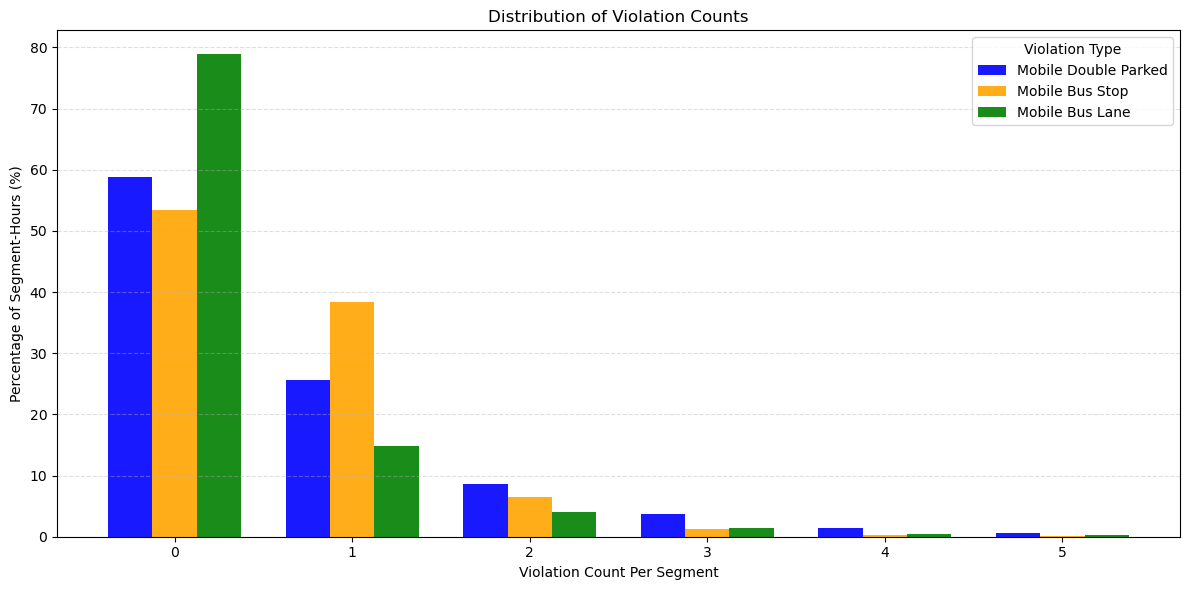

In [115]:
# Percentage Distribution of Violation Counts Per segment 

counts = range(0, 6)


f_dp = [(merged_seg["MOBILE DOUBLE PARKED"] == c).sum() for c in counts]
f_bs = [(merged_seg["MOBILE BUS STOP"] == c).sum()     for c in counts]
f_bl = [(merged_seg["MOBILE BUS LANE"] == c).sum()     for c in counts]


f_dp = [val / merged_seg["MOBILE DOUBLE PARKED"].count() * 100 for val in f_dp]
f_bs = [val / merged_seg["MOBILE BUS STOP"].count() * 100      for val in f_bs]
f_bl = [val / merged_seg["MOBILE BUS LANE"].count() * 100      for val in f_bl]


x = np.arange(len(counts))
width = 0.25


fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width, f_dp, width, label="Mobile Double Parked", color="#0000FF", alpha=0.9)
ax.bar(x,         f_bs, width, label="Mobile Bus Stop",     color="#FFA500", alpha=0.9)
ax.bar(x + width, f_bl, width, label="Mobile Bus Lane",     color="#008000", alpha=0.9)

ax.set_xticks(x)
ax.set_xticklabels([str(c) for c in counts])
ax.set_xlabel("Violation Count Per Segment")
ax.set_ylabel("Percentage of Segment-Hours (%)")
ax.set_title("Distribution of Violation Counts")
ax.legend(title="Violation Type")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



In [116]:
route_id = "BX36"
df_route = merged_seg[merged_seg["Route ID"] == route_id]

print("Rows for route", route_id, ":", len(df_route))
print(df_route[["Average Travel Time","MOBILE BUS LANE","MOBILE BUS STOP","MOBILE DOUBLE PARKED"]].head())


Rows for route BX36 : 53566
       Average Travel Time  MOBILE BUS LANE  MOBILE BUS STOP  \
14805            11.632458              NaN              NaN   
14818            10.415154              0.0              0.0   
14827             8.095830              NaN              NaN   
14839             8.478072              NaN              NaN   
14857             9.730206              NaN              NaN   

       MOBILE DOUBLE PARKED  
14805                   NaN  
14818                   2.0  
14827                   NaN  
14839                   NaN  
14857                   NaN  


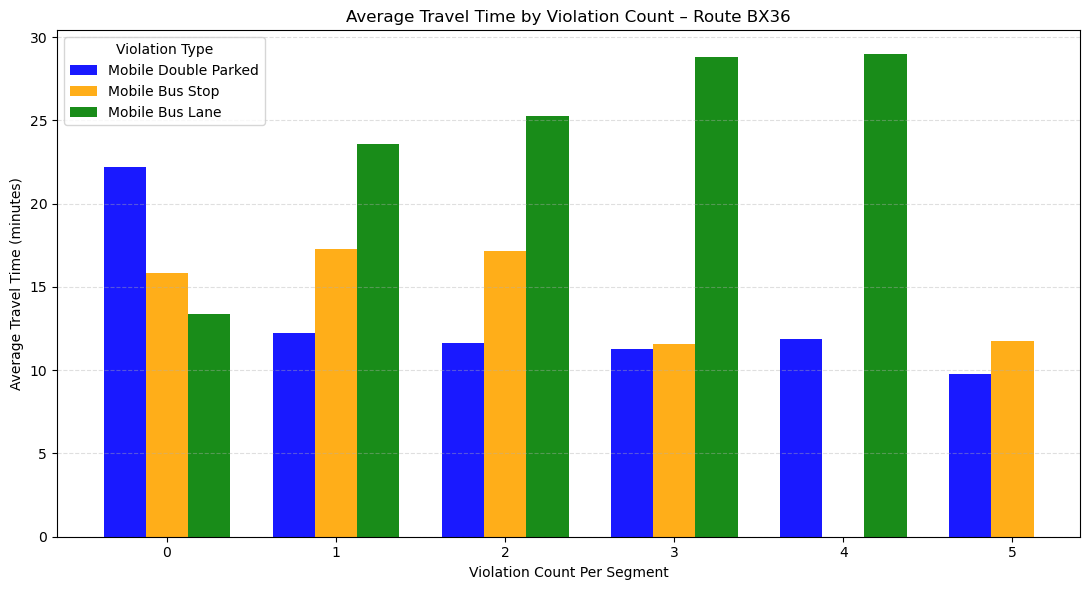

In [117]:
#Grouped Bar Chart for BX36. Violation types on x and travel times per segment on Y

counts = range(0, 6)

y_dp = [df_route.loc[df_route["MOBILE DOUBLE PARKED"] == c, "Average Travel Time"].mean() for c in counts]
y_bs = [df_route.loc[df_route["MOBILE BUS STOP"] == c, "Average Travel Time"].mean() for c in counts]
y_bl = [df_route.loc[df_route["MOBILE BUS LANE"] == c, "Average Travel Time"].mean() for c in counts]

x = np.arange(len(counts))
width = 0.25

fig, ax = plt.subplots(figsize=(11, 6))

ax.bar(x - width, y_dp, width, label="Mobile Double Parked",    color="#0000FF", alpha=0.9)
ax.bar(x,         y_bs, width, label="Mobile Bus Stop",         color="#FFA500", alpha=0.9)
ax.bar(x + width, y_bl, width, label="Mobile Bus Lane",         color="#008000", alpha=0.9)

ax.set_xticks(x)
ax.set_xticklabels([str(c) for c in counts])
ax.set_xlabel("Violation Count Per Segment")
ax.set_ylabel("Average Travel Time (minutes)")
ax.set_title(f"Average Travel Time by Violation Count – Route {route_id}")
ax.legend(title="Violation Type")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [106]:
route_id = "M15+"
df_route = merged_seg[merged_seg["Route ID"] == route_id]

print("Rows for route", route_id, ":", len(df_route))
print(df_route[["Average Travel Time","MOBILE BUS LANE","MOBILE BUS STOP","MOBILE DOUBLE PARKED"]].head())

Rows for route M15+ : 32183
      Average Travel Time  MOBILE BUS LANE  MOBILE BUS STOP  \
6252            44.223738              2.0              0.0   
6253            35.875926              NaN              NaN   
6264            45.555030              1.0              1.0   
6269            51.719640              0.0              1.0   
6278            24.075000              0.0              0.0   

      MOBILE DOUBLE PARKED  
6252                   0.0  
6253                   NaN  
6264                   0.0  
6269                   0.0  
6278                   1.0  


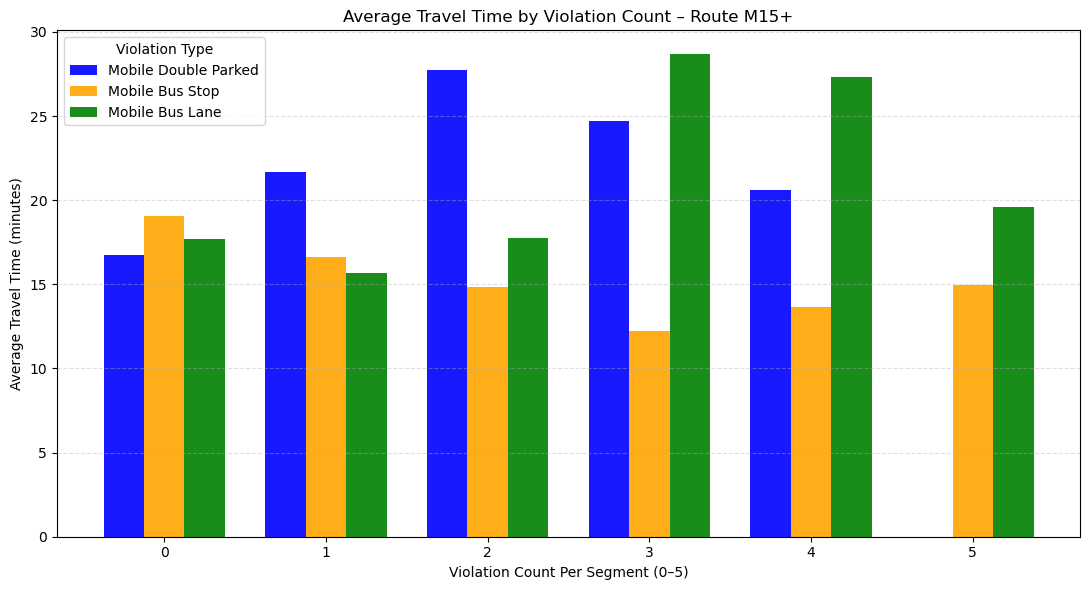

In [111]:
#Grouped Bar Chart for M15+. Violation types on x and travel times per segment on Y

counts = range(0, 6)

y_dp = [df_route.loc[df_route["MOBILE DOUBLE PARKED"] == c, "Average Travel Time"].mean() for c in counts]
y_bs = [df_route.loc[df_route["MOBILE BUS STOP"] == c, "Average Travel Time"].mean() for c in counts]
y_bl = [df_route.loc[df_route["MOBILE BUS LANE"] == c, "Average Travel Time"].mean() for c in counts]

x = np.arange(len(counts))
width = 0.25

fig, ax = plt.subplots(figsize=(11, 6))

ax.bar(x - width, y_dp, width, label="Mobile Double Parked",    color="#0000FF", alpha=0.9)
ax.bar(x,         y_bs, width, label="Mobile Bus Stop",         color="#FFA500", alpha=0.9)
ax.bar(x + width, y_bl, width, label="Mobile Bus Lane",         color="#008000", alpha=0.9)

ax.set_xticks(x)
ax.set_xticklabels([str(c) for c in counts])
ax.set_xlabel("Violation Count Per Segment (0–5)")
ax.set_ylabel("Average Travel Time (minutes)")
ax.set_title(f"Average Travel Time by Violation Count – Route {route_id}")
ax.legend(title="Violation Type")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()